In [6]:
import numpy as np 
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('abalone.csv')
df['Sex'] = df['Sex'].map(lambda x: 1 if x == 'M' else(-1 if x == 'F' else 0))
df.head()

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,-1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
X = df.iloc[:, :-1]
y = df['Rings']

In [4]:
cv = KFold(n_splits=5, random_state=1, shuffle=True)
cv_score = np.zeros(50)
for trees in range(50):
    clf = RandomForestRegressor(n_estimators=trees+1, random_state=1)
    #clf.fit(X, y)
    cv_score[trees] = np.mean(cross_val_score(clf, X, y, cv=cv, scoring='r2'))

In [9]:
np.nonzero(cv_score>0.52)

(array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
        37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49], dtype=int64),)

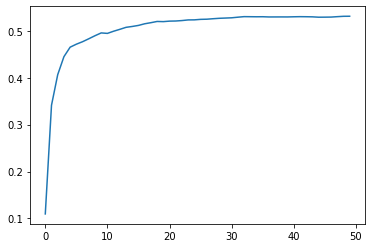

In [7]:
plt.plot(cv_score)